##### Negative Turnovers

In [831]:
import pandas as pd

# read data files
df_bu_feat = pd.read_csv("data/bu_feat.csv.gz") 
df_train = pd.read_csv("data/train.csv.gz") 
df_test = pd.read_csv("data/test.csv.gz")

In [832]:
# create an unified Dataframe
df_train_feat = pd.merge(df_train, df_bu_feat, how="left", on = "but_num_business_unit")
df_test_feat = pd.merge(df_test, df_bu_feat, how="left", on = "but_num_business_unit")
df_feat = pd.concat([df_train_feat,df_test_feat])

In [833]:
# Display the first few rows of the DataFrame
df_feat

,day_id,but_num_business_unit,dpt_num_department,turnover,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
0,2017-09-30,64,127,580.308443,16400,45.625172,0.111939,70,10
1,2017-09-30,119,127,1512.995918,74100,46.195037,6.254448,51,4
2,2017-09-30,4,88,668.593556,6600,43.600994,7.078160,55,10
3,2017-09-30,425,127,0.000000,59000,50.617921,3.084186,33,3
4,2017-09-30,513,73,0.000000,33610,44.717366,-0.733429,33,3
...,...,...,...,...,...,...,...,...,...
10131,2017-10-07,61,88,NaN,60740,49.238738,2.468513,69,4
10132,2017-10-07,641,117,NaN,17810,45.749749,-0.675981,70,10
10133,2017-10-07,724,117,NaN,38150,45.327709,4.804922,52,4
10134,2017-10-07,1302,117,NaN,74950,46.069548,6.549448,51,4


In [834]:
# Display basic information about the DataFrame
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287855 entries, 0 to 10135
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   day_id                 287855 non-null  object 
 1   but_num_business_unit  287855 non-null  int64  
 2   dpt_num_department     287855 non-null  int64  
 3   turnover               277719 non-null  float64
 4   but_postcode           287855 non-null  int64  
 5   but_latitude           287855 non-null  float64
 6   but_longitude          287855 non-null  float64
 7   but_region_idr_region  287855 non-null  int64  
 8   zod_idr_zone_dgr       287855 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 22.0+ MB


In [835]:
# Check for missing values
print(df_feat.isnull().sum())
print("The size of test set is :",len(df_test_feat))

day_id                       0
but_num_business_unit        0
dpt_num_department           0
turnover                 10136
but_postcode                 0
but_latitude                 0
but_longitude                0
but_region_idr_region        0
zod_idr_zone_dgr             0
dtype: int64
The size of test set is : 10136


In [836]:
# Display basic information about the DataFrame
df_feat.describe()

,but_num_business_unit,dpt_num_department,turnover,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
count,287855.000000,287855.00000,277719.000000,287855.000000,287855.000000,287855.000000,287855.000000,287855.000000
mean,298.449112,101.28597,561.818472,51758.379451,47.023444,2.630127,56.266669,8.497883
std,299.280874,21.66770,2113.229765,26231.113562,2.333011,2.790239,40.194182,11.428899
min,1.000000,73.00000,-69.791165,1100.000000,41.954300,-4.436446,2.000000,1.000000
25%,82.000000,88.00000,11.785140,31150.000000,44.940409,0.638869,30.000000,4.000000
50%,206.000000,88.00000,232.724186,57200.000000,47.433276,2.599206,64.000000,6.000000
75%,427.000000,127.00000,676.655825,74500.000000,48.892725,4.867583,72.000000,10.000000
max,1887.000000,127.00000,1000000.000000,98000.000000,51.050275,8.796100,178.000000,72.000000


In [837]:
# Filter rows where the turnover value is negative
filtered_negative_df_train_feat = df_train_feat[df_train_feat["turnover"] <=0]
print("Part of train data that has negative turnover is ",round(len(filtered_negative_df_train_feat)/len(df_train_feat)*100,2),"%")
filtered_negative_df_train_feat

Part of train data that has negative turnover is  7.81 %


,day_id,but_num_business_unit,dpt_num_department,turnover,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
3,2017-09-30,425,127,0.0,59000,50.617921,3.084186,33,3
4,2017-09-30,513,73,0.0,33610,44.717366,-0.733429,33,3
59,2017-09-30,1887,73,0.0,59240,51.050275,2.393182,65,4
67,2017-09-30,513,127,0.0,33610,44.717366,-0.733429,33,3
92,2017-09-30,1875,88,0.0,83140,43.111000,5.812300,55,10
...,...,...,...,...,...,...,...,...,...
277664,2012-12-29,522,73,0.0,26200,44.526640,4.744353,115,10
277666,2012-12-29,648,73,0.0,59000,50.617364,3.084478,32,1
277670,2012-12-29,276,73,0.0,57400,48.719183,7.042705,4,4
277682,2012-12-29,71,73,0.0,38120,45.240255,5.668488,52,4


In [838]:
(len(filtered_negative_df_train_feat)/len(df_train_feat))*100

7.8147335976292585

In [839]:
# add new date variables to deep dive the negatif values of turnover
filtered_negative_df_train_feat["day_id"] = pd.to_datetime(filtered_negative_df_train_feat["day_id"])
filtered_negative_df_train_feat["day_id_day_name"] = [e.day_name() for e in filtered_negative_df_train_feat["day_id"]]
filtered_negative_df_train_feat["day_id_week"] = filtered_negative_df_train_feat.day_id.dt.isocalendar().week
filtered_negative_df_train_feat["day_id_month"] = filtered_negative_df_train_feat["day_id"].dt.month
filtered_negative_df_train_feat["day_id_year"] = filtered_negative_df_train_feat["day_id"].dt.year

/var/folders/dt/0rph8wwj0ld_0cv19w9m4w900000gn/T/ipykernel_56148/4118439271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_negative_df_train_feat["day_id"] = pd.to_datetime(filtered_negative_df_train_feat["day_id"])
/var/folders/dt/0rph8wwj0ld_0cv19w9m4w900000gn/T/ipykernel_56148/4118439271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_negative_df_train_feat["day_id_day_name"] = [e.day_name() for e in filtered_negative_df_train_feat["day_id"]]
/var/folders/dt/0rph8wwj0ld_0cv19w9

In [840]:
filtered_negative_df_train_feat.describe()

,day_id,but_num_business_unit,dpt_num_department,turnover,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr,day_id_week,day_id_month,day_id_year
count,21703,21703.000000,21703.000000,21703.000000,21703.000000,21703.000000,21703.000000,21703.000000,21703.000000,21703.0,21703.000000,21703.000000
mean,2015-03-02 16:04:43.979173376,399.587384,97.457863,-0.468758,51590.801548,46.977150,3.110932,56.087776,9.982767,25.107957,6.192001,2014.694512
min,2012-12-29 00:00:00,1.000000,73.000000,-69.791165,1100.000000,41.954300,-4.436446,2.000000,1.000000,1.0,1.000000,2012.000000
25%,2014-02-08 00:00:00,171.000000,73.000000,0.000000,33000.000000,44.617021,1.615343,32.000000,3.000000,16.0,4.000000,2014.000000
50%,2015-01-10 00:00:00,354.000000,117.000000,0.000000,59000.000000,47.315222,3.089500,52.000000,6.000000,24.0,6.000000,2015.000000
75%,2016-04-23 00:00:00,513.000000,117.000000,0.000000,71380.000000,49.033033,5.035823,71.000000,10.000000,34.0,8.000000,2016.000000
max,2017-09-30 00:00:00,1887.000000,127.000000,0.000000,98000.000000,51.050275,8.796100,178.000000,72.000000,53.0,12.000000,2017.000000
std,NaN,329.050407,21.178569,1.796083,25419.239749,2.589143,2.507648,44.650535,16.609719,13.096668,2.989668,1.336083


In [841]:
filtered_negative_df_train_feat["turnover"].describe()

count    21703.000000
mean        -0.468758
std          1.796083
min        -69.791165
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: turnover, dtype: float64

<Figure size 1200x800 with 0 Axes>

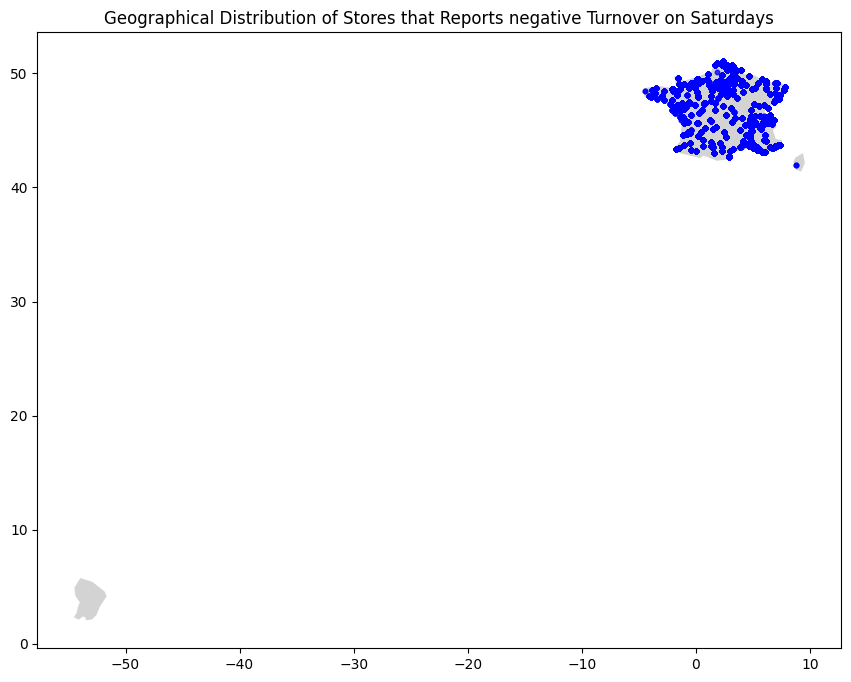

In [842]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Path to the extracted shapefile
shapefile_path = 'ne_110m_admin_0_countries'

# Load the shapefile into a GeoDataFrame
world = gpd.read_file(shapefile_path)

# Filter the GeoDataFrame to only include France
france = world[world['NAME'] == 'France']

# Create GeoDataFrame from df_feat
geometry = [Point(xy) for xy in zip(filtered_negative_df_train_feat['but_longitude'], filtered_negative_df_train_feat['but_latitude'])]
geo_df = gpd.GeoDataFrame(filtered_negative_df_train_feat, geometry=geometry)

# Plot the geographical distribution
plt.figure(figsize=(12, 8))
ax = france.plot(figsize=(12, 8), color='lightgrey')
geo_df.plot(ax=ax, markersize=10, color='blue', alpha=0.5)
plt.title('Geographical Distribution of Stores that Reports negative Turnover on Saturdays')
plt.show()

In [843]:
'''
Min value of negative turnover is -69. Max value is zero. The mean is -??. The count of negative values is 21073 : 7.8% of rows
Negative values doesn't have a visible link with Year, Month, Week, or Geography. 
Hypothesis : negative turnover values are due to technical reporting mistakes. Business Units wanted to report
Action : Replace negative values with the average turnover of that same department across the same year and month. Book a call with Business to understand phenomena and define replacement rules for production
'''

"\nMin value of negative turnover is -69. Max value is zero. The mean is -??. The count of negative values is 21073 : 7.8% of rows\nNegative values doesn't have a visible link with Year, Month, Week, or Geography. \nHypothesis : negative turnover values are due to technical reporting mistakes. Business Units wanted to report\nAction : Replace negative values with the average turnover of that same department across the same year and month. Book a call with Business to understand phenomena and define replacement rules for production\n"

In [844]:
df_train_feat

,day_id,but_num_business_unit,dpt_num_department,turnover,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
0,2017-09-30,64,127,580.308443,16400,45.625172,0.111939,70,10
1,2017-09-30,119,127,1512.995918,74100,46.195037,6.254448,51,4
2,2017-09-30,4,88,668.593556,6600,43.600994,7.078160,55,10
3,2017-09-30,425,127,0.000000,59000,50.617921,3.084186,33,3
4,2017-09-30,513,73,0.000000,33610,44.717366,-0.733429,33,3
...,...,...,...,...,...,...,...,...,...
277714,2012-12-29,131,73,1.461821,69760,45.822363,4.767741,8,4
277715,2012-12-29,237,127,759.283046,13500,43.430995,5.047929,71,10
277716,2012-12-29,129,117,1716.399152,14124,49.154936,-0.287441,30,6
277717,2012-12-29,468,127,1307.357057,94320,48.757857,2.385381,75,6


In [845]:
# add new date variables to deep dive the negatif values of turnover
df_train_feat["day_id"] = pd.to_datetime(df_train_feat["day_id"])
df_train_feat["day_id_day_name"] = [e.day_name() for e in df_train_feat["day_id"]]
df_train_feat["day_id_week"] = df_train_feat.day_id.dt.isocalendar().week
df_train_feat["day_id_month"] = df_train_feat["day_id"].dt.month
df_train_feat["day_id_year"] = df_train_feat["day_id"].dt.year

In [846]:
# Replace negative values with the average turnover of that same department across the same year and month
groupby_df = df_train_feat.groupby(["day_id_year","day_id_month","dpt_num_department"]).mean("turnover")["turnover"].reset_index()
groupby_df = groupby_df.set_index(["day_id_year", "day_id_month", "dpt_num_department"])
df_train_feat = df_train_feat.join(groupby_df,on=["day_id_year","day_id_month","dpt_num_department"],
                how="left",
                rsuffix='_replacement')

In [847]:
# perform the replacement
a = df_train_feat["turnover"]
b = df_train_feat["turnover_replacement"]
df_train_feat["turnover"]=[i if i>0 else j for (i,j) in zip(a,b)]

##### Extreme Turnover

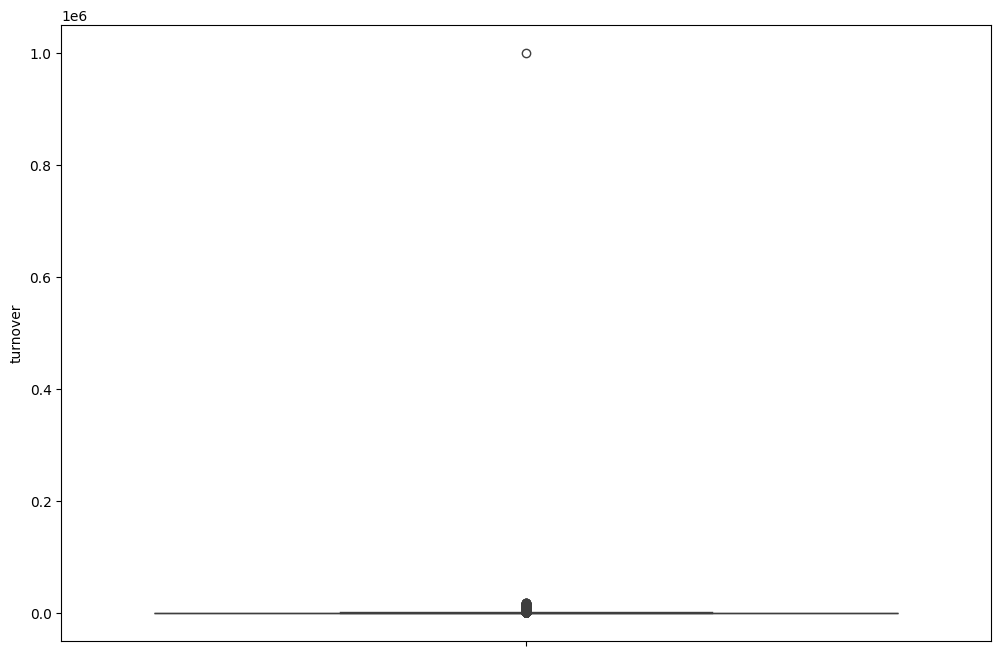

In [848]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots to identify outliers in turnover
plt.figure(figsize=(12, 8))
sns.boxplot(y=df_train_feat["turnover"])
plt.show()

In [849]:
1000000 / df_train_feat["turnover"].quantile(0.99)

np.float64(224.57072936709713)

In [850]:
1000000 / df_train_feat["turnover"].median()

np.float64(3967.3714123629557)

In [851]:
# Filter rows where the turnover value is an outlier
outlier_threshold = df_train_feat["turnover"].quantile(0.95)*10
filtered_df_train_feat = df_train_feat[df_train_feat["turnover"] > outlier_threshold]
filtered_df_train_feat

,day_id,but_num_business_unit,dpt_num_department,turnover,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr,day_id_day_name,day_id_week,day_id_month,day_id_year,turnover_replacement
231272,2013-11-02,30,88,1000000.0,38700,45.197547,5.750372,52,4,Saturday,44,11,2013,1030.69831


In [852]:
# Filter rows and describe turnover of the store grenoble_la_tronche
grenoble_la_tronche_filtered_df_train_feat = df_train_feat[(round(df_train_feat["but_latitude"],6) ==45.197547) & (round(df_train_feat["but_longitude"],6) ==5.750372)]
grenoble_la_tronche_filtered_df_train_feat["turnover"].describe()

count        996.000000
mean        2070.927282
std        31686.691912
min            0.138555
25%           16.642439
50%          398.370770
75%         1896.837808
max      1000000.000000
Name: turnover, dtype: float64

In [853]:
grenoble_la_tronche_filtered_df_train_feat[(grenoble_la_tronche_filtered_df_train_feat["day_id_year"]==2013)&(grenoble_la_tronche_filtered_df_train_feat["day_id_month"]==11)&(grenoble_la_tronche_filtered_df_train_feat["day_id_day_name"]=="Saturday")&(round(grenoble_la_tronche_filtered_df_train_feat["but_latitude"],6) ==45.197547) & (round(grenoble_la_tronche_filtered_df_train_feat["but_longitude"],6) ==5.750372)&(grenoble_la_tronche_filtered_df_train_feat["dpt_num_department"]==88)][["day_id","turnover","but_postcode","but_latitude","but_longitude","day_id_day_name"]].head(4)["turnover"].mean()

np.float64(291.66800165119463)

In [854]:
replacement_value = grenoble_la_tronche_filtered_df_train_feat[(grenoble_la_tronche_filtered_df_train_feat["day_id_year"]==2013)&(grenoble_la_tronche_filtered_df_train_feat["day_id_month"]==11)&(grenoble_la_tronche_filtered_df_train_feat["day_id_day_name"]=="Saturday")&(round(grenoble_la_tronche_filtered_df_train_feat["but_latitude"],6) ==45.197547) & (round(grenoble_la_tronche_filtered_df_train_feat["but_longitude"],6) ==5.750372)&(grenoble_la_tronche_filtered_df_train_feat["dpt_num_department"]==88)][["day_id","turnover","but_postcode","but_latitude","but_longitude","day_id_day_name"]].head(4)["turnover"].mean()

In [855]:
# Replace the value at index 231272 in the 'turnover' column
df_train_feat.loc[231272, 'turnover'] = replacement_value

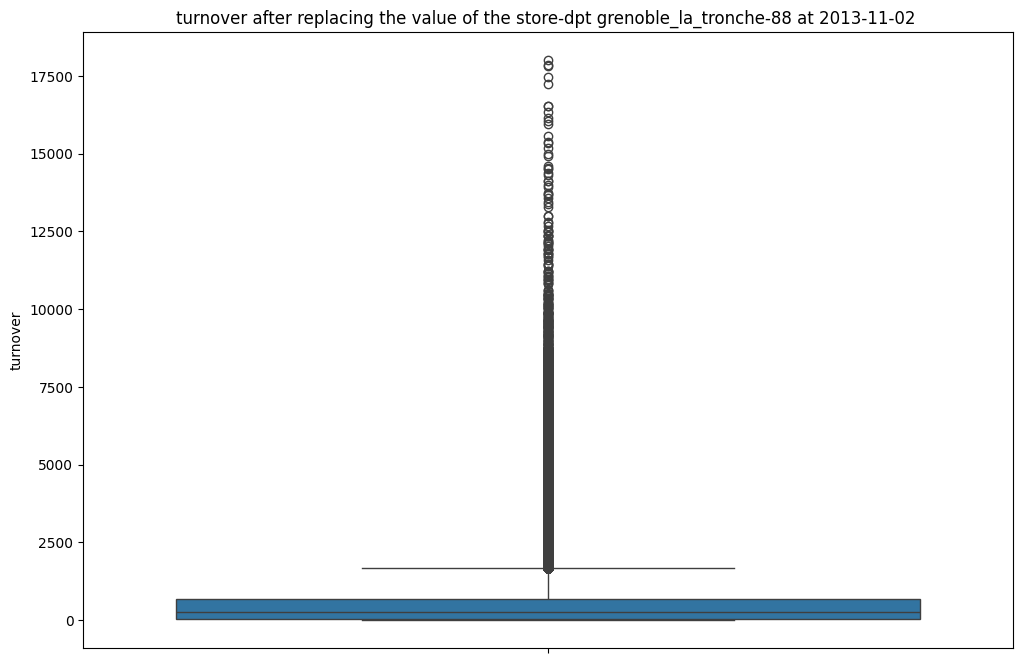

In [856]:
# turnover = 1000000 is à priori an outlier. Let's delete it
df_train_feat = df_train_feat[df_train_feat['turnover'] != 1000000]

# replot the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(y=df_train_feat["turnover"])
plt.title("turnover after replacing the value of the store-dpt grenoble_la_tronche-88 at 2013-11-02 ")
plt.show()

##### Turnover Distribution

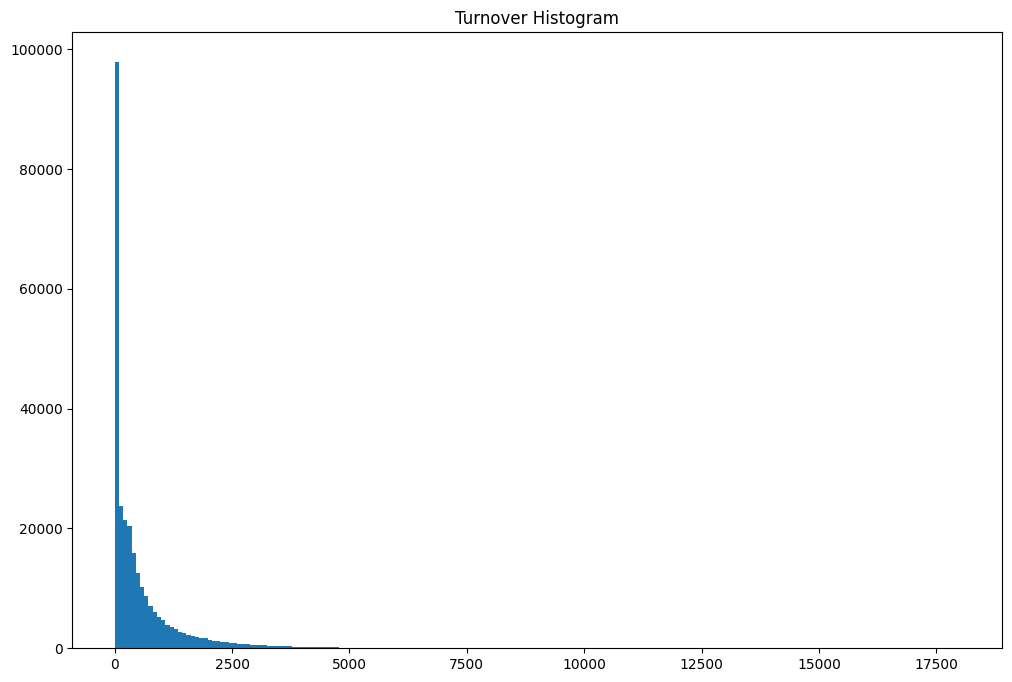

In [857]:
# Plot histogram
plt.figure(figsize=(12, 8))
df_train_feat["turnover"].hist(bins=200)
plt.title("Turnover Histogram")
plt.grid(False)
plt.show()

In [858]:
df_train_feat["turnover"].describe()

count    277719.000000
mean        571.871531
std         932.111012
min           0.000318
25%          30.660432
50%         252.056058
75%         691.040617
max       18006.051210
Name: turnover, dtype: float64

Text(0.5, 1.0, 'Histogram of Log10(Turnover)')

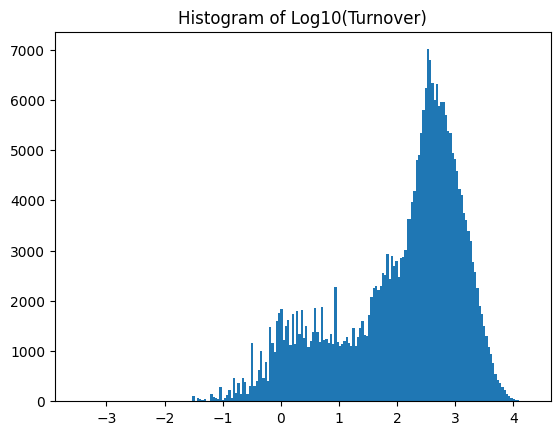

In [859]:
import numpy as np
# compute log 
log_turnover = pd.DataFrame(np.log10(df_train_feat["turnover"]))
# Plot histogram
log_turnover.hist(bins=200)
plt.grid(False)
plt.title("Histogram of Log10(Turnover)")

Text(0.5, 1.0, 'Histogram of Log10(Turnover) Truncated Threshold 1')

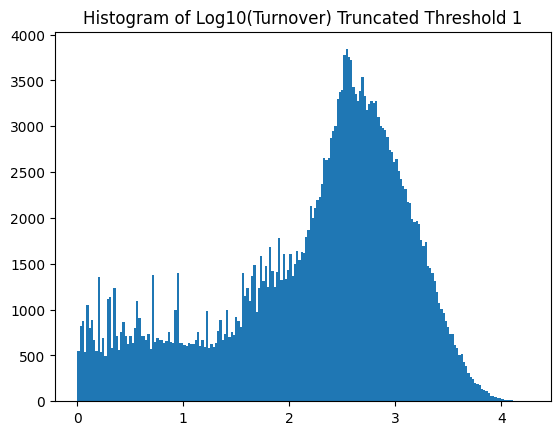

In [860]:
# filter turnover more then 1
df_train_feat_more_1 = df_train_feat[df_train_feat["turnover"]>1]["turnover"]
# compute log 
log_turnover_1 = pd.DataFrame(np.log10(df_train_feat_more_1))
# Plot histogram
log_turnover_1.hist(bins=200)
plt.grid(False)
plt.title("Histogram of Log10(Turnover) Truncated Threshold 1")

/Users/mohssinechebli/Documents/Repos/deployement-decathlon-turnover-forecast/env/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Histogram of Log Log Turnover')

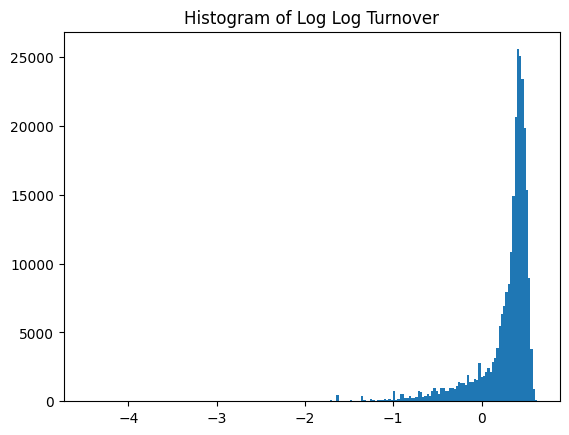

In [861]:
# compute log log 
log_log_turnover = pd.DataFrame(np.log10(np.log10(df_train_feat["turnover"])))
# Plot histogram
log_log_turnover.hist(bins=200)
plt.grid(False)
plt.title("Histogram of Log Log Turnover")

In [862]:
df_train_feat["turnover"]

0          580.308443
1         1512.995918
2          668.593556
3          909.076489
4           65.491959
             ...     
277714       1.461821
277715     759.283046
277716    1716.399152
277717    1307.357057
277718      53.337413
Name: turnover, Length: 277719, dtype: float64

/var/folders/dt/0rph8wwj0ld_0cv19w9m4w900000gn/T/ipykernel_56148/3906583614.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, hist = True, kde = True,
/Users/mohssinechebli/Documents/Repos/deployement-decathlon-turnover-forecast/env/lib/python3.9/site-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/dt/0rph8wwj0ld_0cv19w9m4w900000gn/T/ipykernel_56148/3906583614.py:31: UserWarning: 

`distplot` is a deprecate

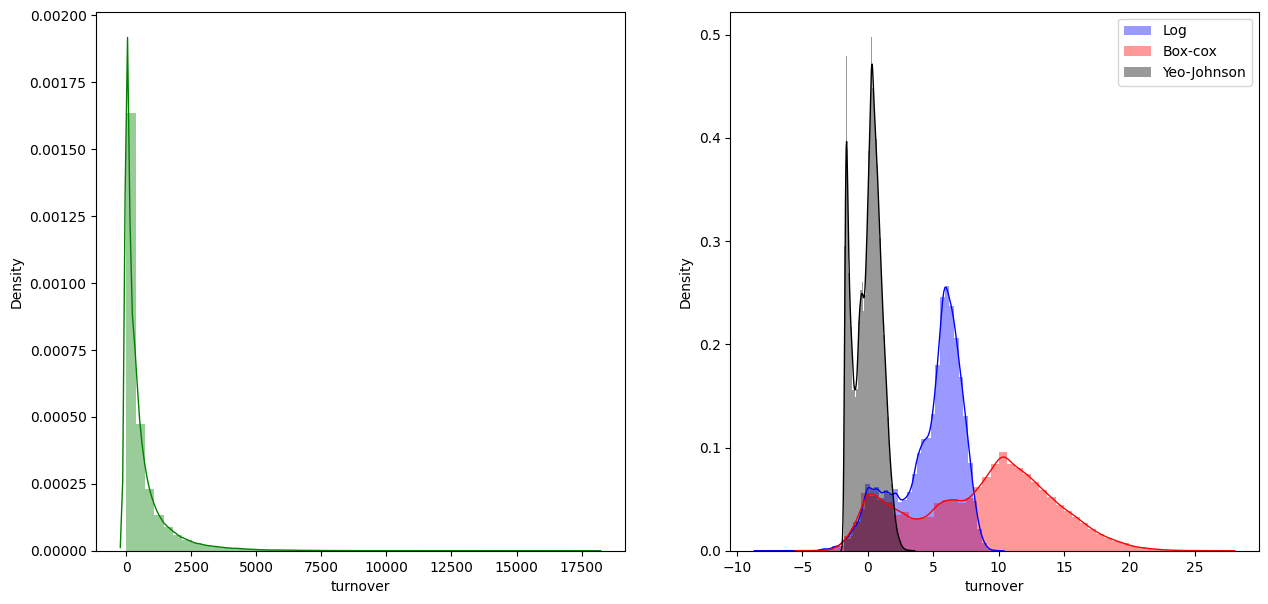

In [863]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from scipy import stats

original_data = df_train_feat["turnover"]

# Apply Log
turnover_transformed_log = np.log(df_train_feat["turnover"])

# Apply Box-cox : transform training data & save lambda value
turnover_transformed_box_cox, fitted_lambda = stats.boxcox(original_data)
'''
fitted_lambda = 1.2
fitted_data = stats.boxcox(original_data,lmbda=fitted_lambda)
'''
# Apply Yeo-Johnson transformation
turnover = df_train_feat["turnover"].values.reshape(-1, 1)  # Reshape for the transformer
pt = PowerTransformer(method='yeo-johnson')
turnover_transformed_yeo = pt.fit_transform(turnover)

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = True, kde = True,
            kde_kws = {'shade': False, 'linewidth': 1}, 
            label = "Original", color ="green", ax = ax[0])
 
sns.distplot(turnover_transformed_log, hist = True, kde = True,
            kde_kws = {'shade': False, 'linewidth': 1}, 
            label = "Log", color ="blue", ax = ax[1])

sns.distplot(turnover_transformed_box_cox, hist = True, kde = True,
            kde_kws = {'shade': False, 'linewidth': 1}, 
            label = "Box-cox", color ="red", ax = ax[1])

sns.distplot(turnover_transformed_yeo, hist = True, kde = True,
            kde_kws = {'shade': False, 'linewidth': 1}, 
            label = "Yeo-Johnson", color ="black", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(7)
fig.set_figwidth(15)


##### Data Coverage

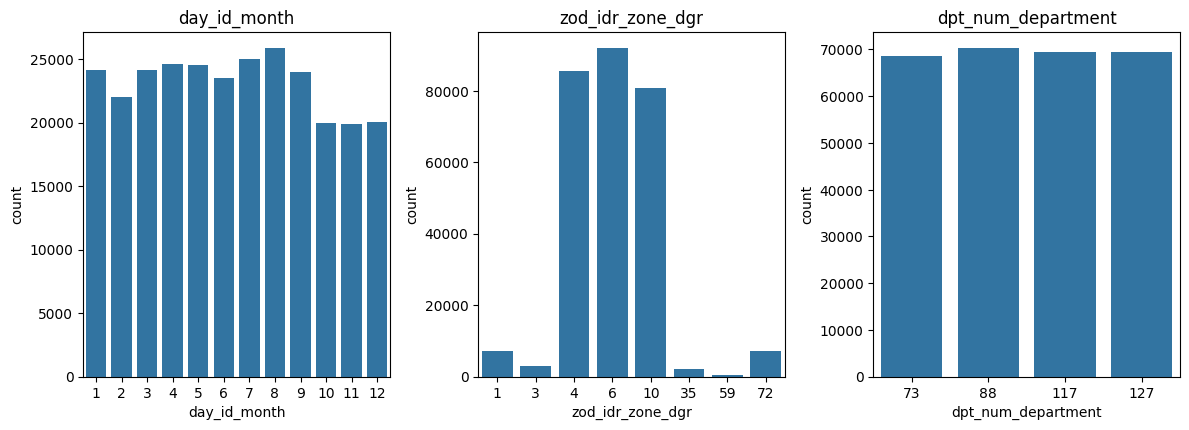

In [864]:
# categorical columns
cat_attrib = [
            "day_id_month",
            "zod_idr_zone_dgr",
            "dpt_num_department",
        ]

# Plot bar charts for categorical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_attrib):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df_train_feat[col])
    plt.title(col)
plt.tight_layout()
plt.show()

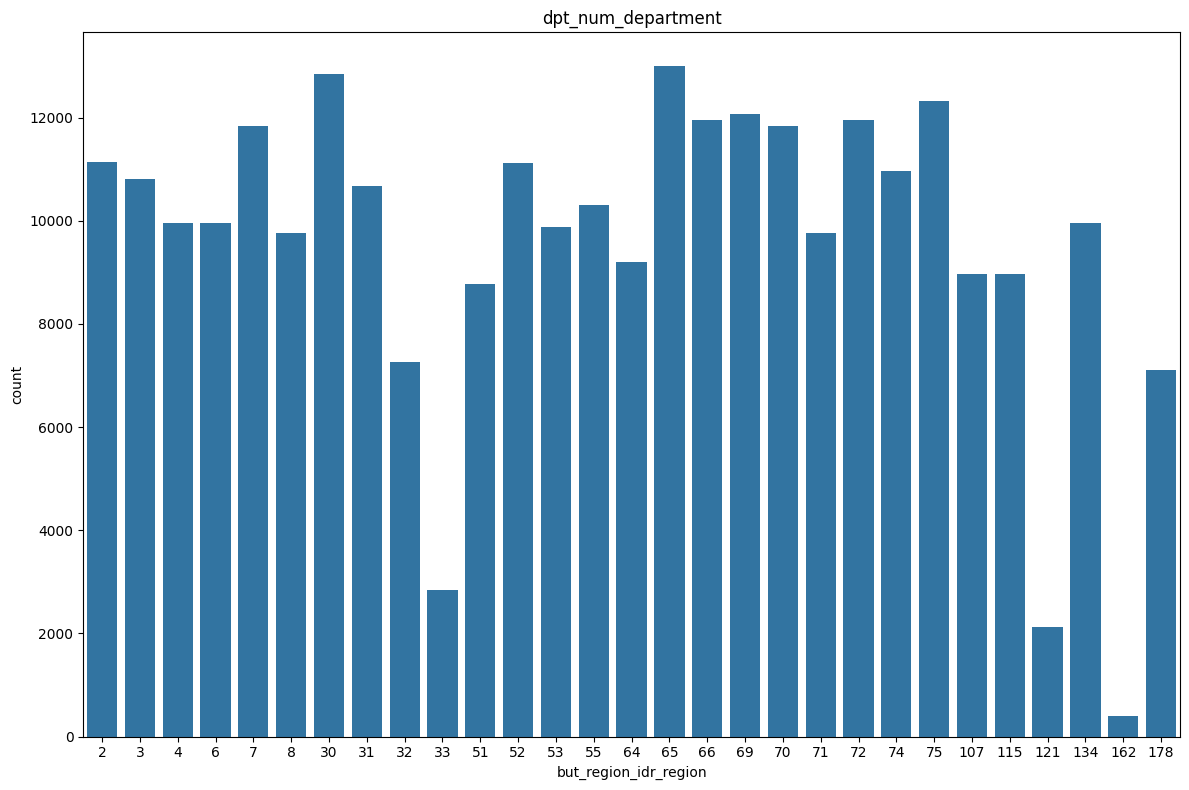

In [865]:
# Plot bar charts for but_region_idr_region
plt.figure(figsize=(12, 8))
sns.countplot(x=df_train_feat["but_region_idr_region"])
plt.title(col)
plt.tight_layout()
plt.show()

##### Correlation check for Baseline Regression Framework

In [866]:
# Compute the correlation matrix
correlation_matrix = df_train_feat.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Saturday'

##### Turnover Time Series EDA

In [ ]:
# aggregate turnover data accross stores
ts = pd.DataFrame(df_train_feat[["day_id","turnover"]]).groupby("day_id").sum()
ts.index = pd.to_datetime(ts.index)

Text(0.5, 1.0, 'turnover time series')

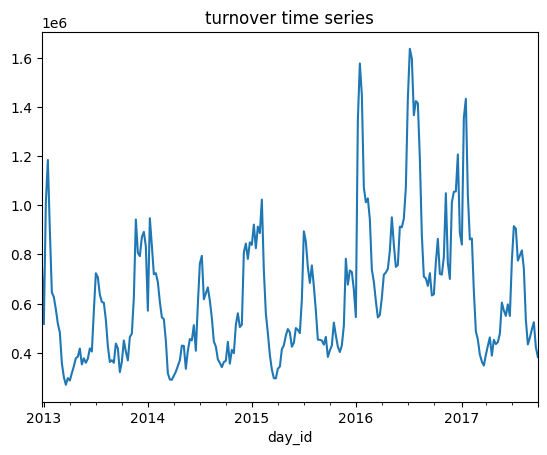

In [ ]:
ts["turnover"].plot()
plt.title("turnover time series")

/var/folders/dt/0rph8wwj0ld_0cv19w9m4w900000gn/T/ipykernel_56148/2564474660.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_monthly = ts.resample('1M').sum()


<Axes: xlabel='day_id'>

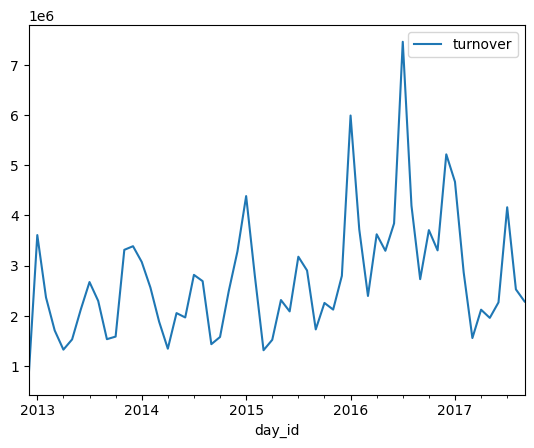

In [ ]:
# We downsample from weekly to monthly frequency aggregated using sum
ts_monthly = ts.resample('1M').sum()
ts_monthly.plot()

/var/folders/dt/0rph8wwj0ld_0cv19w9m4w900000gn/T/ipykernel_56148/308736791.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_quartly = ts.resample('4M').sum()


<Axes: xlabel='day_id'>

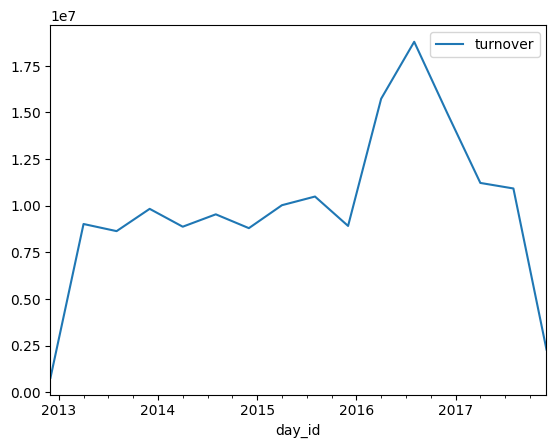

In [ ]:
# We downsample from weekly to quarter frequency aggregated using sum
ts_quartly = ts.resample('4M').sum()
ts_quartly.plot()

/var/folders/dt/0rph8wwj0ld_0cv19w9m4w900000gn/T/ipykernel_56148/1543627687.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_yearly = ts.resample('1Y').sum()


<Axes: xlabel='day_id'>

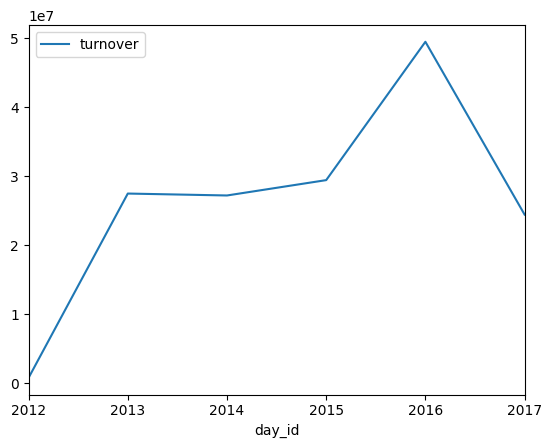

In [ ]:
# We downsample from weekly to annualy frequency aggregated using sum
ts_yearly = ts.resample('1Y').sum()
ts_yearly.plot()

/Users/mohssinechebli/Documents/Repos/deployement-decathlon-turnover-forecast/env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11356D+01    |proj g|=  1.68878D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   1.689D-06   1.114D+01
  F =   11.135631338367208     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                            Unobserved Components Results                            
Dep. Variable:                      turnover   No. Observations:                  249
Model:                

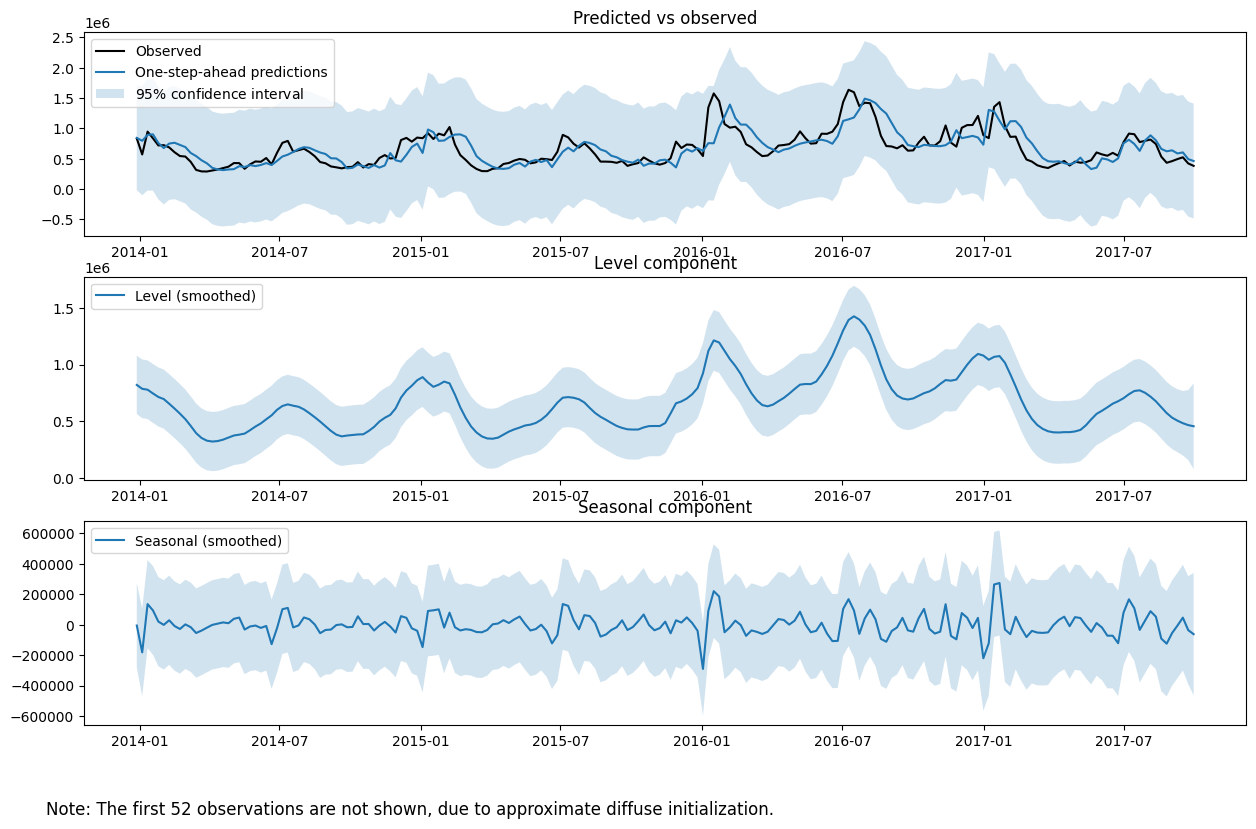

In [917]:
from statsmodels.tsa.statespace.structural import UnobservedComponents
levels = ["irregular",
          "fixed intercept",
          "deterministic constant",
          "local level",
          "random walk",
          "fixed slope",
          "deterministic trend",
          "local linear deterministic trend",
          "random walk with drift",
          "local linear trend",
          "smooth trend",
          "random trend"]
# Define the Unobserved Components Model
ucm_model = UnobservedComponents(ts, 
                                 level= "local level",
                                 seasonal=52 # 52 weeks in a year
                                 )

# Fit the model
ucm_result = ucm_model.fit()

# Print the model summary
print(ucm_result.summary())

# Plot the decomposed components
ucm_result.plot_components(legend_loc='upper left', figsize=(15, 9))
plt.show()

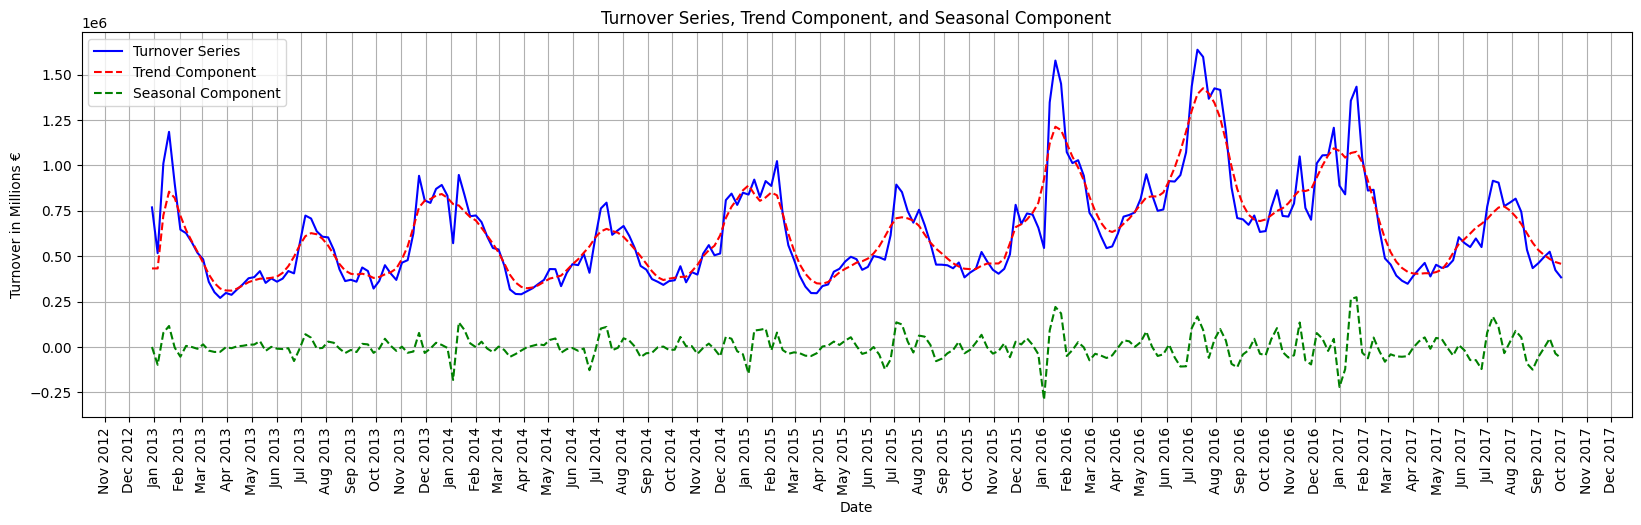

In [918]:
import matplotlib.dates as mdates

date_rng = pd.date_range(start='2012-12-29', end='2017-09-30', freq='W-SAT')
time_series = pd.Series(np.array(ts["turnover"]), index=date_rng)

# Extract the components
trend_component = ucm_result.level.smoothed
trend_component[0] = trend_component[1]
trend_component = pd.Series(trend_component, index=date_rng)
seasonal_component = ucm_result.seasonal.smoothed
seasonal_component=pd.Series(seasonal_component, index=date_rng)
# Plot the original series, trend component, and seasonal component
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(time_series, label='Turnover Series', color='blue')
ax.plot(trend_component, label='Trend Component', color='red', linestyle='--')
ax.plot(seasonal_component, label='Seasonal Component', color='green', linestyle='--')

# Improve the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show major ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format the ticks as month and year

# Rotate the x-axis labels to be vertical
plt.setp(ax.get_xticklabels(), rotation=90)

plt.xlabel('Date')
plt.ylabel('Turnover in Millions €')
plt.legend(loc='upper left')
plt.title('Turnover Series, Trend Component, and Seasonal Component')
plt.grid(True)
plt.show()

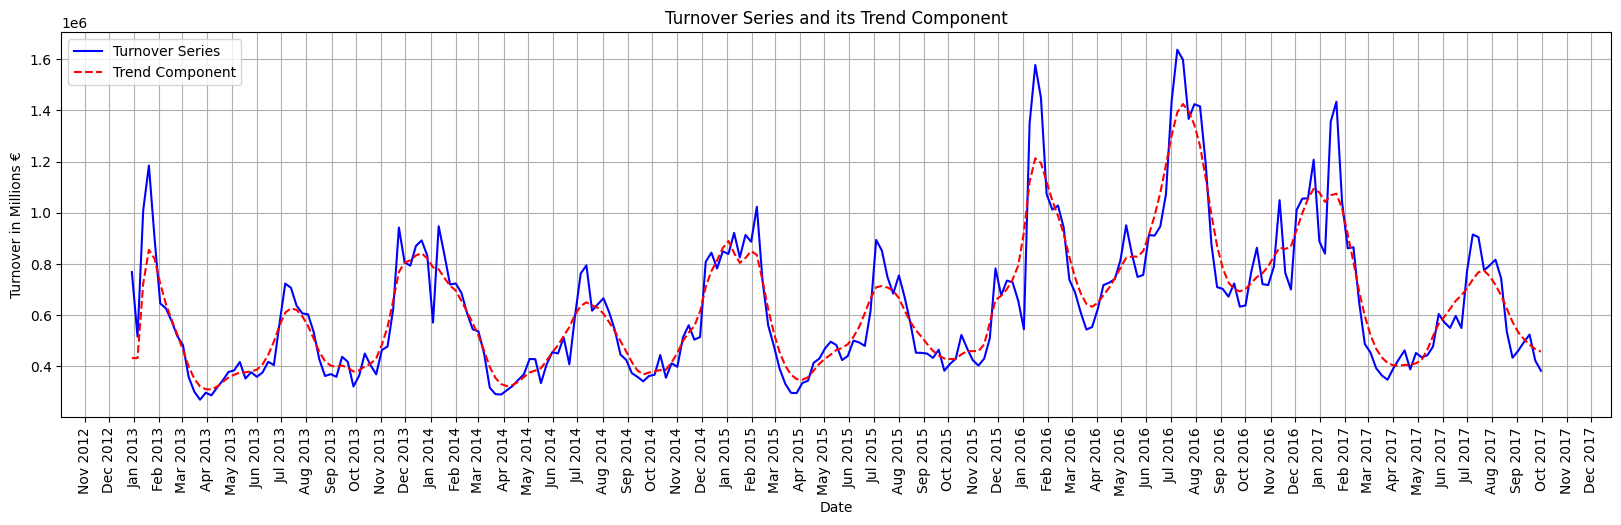

In [919]:
import matplotlib.dates as mdates

date_rng = pd.date_range(start='2012-12-29', end='2017-09-30', freq='W-SAT')
time_series = pd.Series(np.array(ts["turnover"]), index=date_rng)

# Extract the components
trend_component = ucm_result.level.smoothed
trend_component[0] = trend_component[1]
trend_component = pd.Series(trend_component, index=date_rng)

# Plot the original series, trend component, and seasonal component
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(time_series, label='Turnover Series', color='blue')
ax.plot(trend_component, label='Trend Component', color='red', linestyle='--')

# Improve the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show major ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format the ticks as month and year

# Rotate the x-axis labels to be vertical
plt.setp(ax.get_xticklabels(), rotation=90)

plt.xlabel('Date')
plt.ylabel('Turnover in Millions €')
plt.legend(loc='upper left')
plt.title('Turnover Series and its Trend Component')
plt.grid(True)
plt.show()

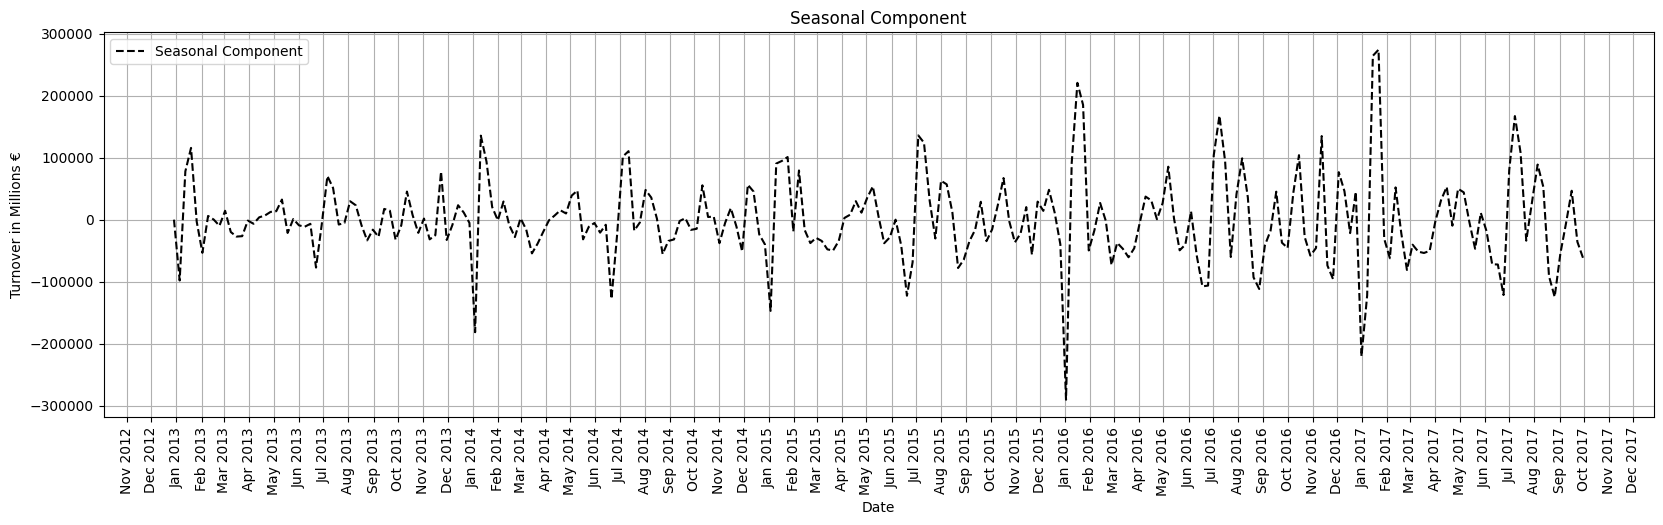

In [920]:
# Plot the seasonal component
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(seasonal_component, label='Seasonal Component', color='black', linestyle='--')

# Improve the x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show major ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format the ticks as month and year

# Rotate the x-axis labels to be vertical
plt.setp(ax.get_xticklabels(), rotation=90)

plt.xlabel('Date')
plt.ylabel('Turnover in Millions €')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.grid(True)
plt.show()

##### Store x Dpt Podium

In [774]:
df_train_feat = df_train_feat.set_index("day_id")
turnover_grouped = df_train_feat.groupby(["but_num_business_unit"]).sum()["turnover"]

In [775]:
turnover_grouped.nlargest(3)

but_num_business_unit
121    1.868566e+06
189    1.812130e+06
118    1.757902e+06
Name: turnover, dtype: float64

In [779]:
df_train_feat[(df_train_feat["but_num_business_unit"]==118)].head(1)

,but_num_business_unit,dpt_num_department,turnover,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr,day_id_day_name,day_id_week,day_id_month,day_id_year,turnover_replacement
day_id,,,,,,,,,,,,,
2017-09-30,118,127,1843.744124,59650,50.644545,3.142438,65,4,Saturday,39,9,2017,909.076489
